#  Singlet doublet fermion dark matter model

We expect here degenerate masses so we must be carefull about the DM particles that is registered by micrOMEGAS:

We need to edit prtcls1.mld to have the righ order with Nv0 appearing first

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *

Define functions to change from general basis to physical basis 

Define function to run official micromegas IDM

In [3]:
def run_official_idm_lha(spc,check=False):
    '''
    Standard PDGs for inert scalars
    '''
    laL=(spc.blocks['MINPAR'][3]+spc.blocks['MINPAR'][4]+spc.blocks['MINPAR'][5])/2.
    MDM=spc.blocks['MASS'][35];MH3=spc.blocks['MASS'][36];MHC=spc.blocks['MASS'][37]
    la2=spc.blocks['MINPAR'][2];Mh=spc.blocks['MASS'][25]
    return run_official_idm(MDM,MH3,MHC,laL,la2,Mh,check=check)


## Check one point

In [4]:
a=hep(MODEL='SimplifiedDMDFDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [5]:
a.LHA.blocks

_dict([('MODSEL',
        MODSEL { 1 : 1              #  1/0: High/low scale input ; 2 : 1              # Boundary Condition  ; 6 : 1              # Generation Mixing  }),
       ('SMINPUTS',
        SMINPUTS { 2 : 1.166370E-05   # G_F,Fermi constant ; 3 : 1.187000E-01   # alpha_s(MZ) SM MSbar ; 4 : 9.118870E+01   # Z-boson pole mass ; 5 : 4.180000E+00   # m_b(mb) SM MSbar ; 6 : 1.735000E+02   # m_top(pole) ; 7 : 1.776690E+00   # m_tau(pole)  }),
       ('MINPAR',
        MINPAR { 1 : 1.3000000E-01  # lambda1INPUT; 2 : 2.0000000E+02  # MDFINPUT }),
       ('SPHENOINPUT',
        SPHENOINPUT { 1 : -1             # error level ; 2 : 0              # SPA conventions ; 11 : 1              # calculate branching ratios ; 13 : 1               # 3-Body decays: none (0), fermion (1), scalar (2), both (3); 14 : 0              # Run couplings to scale of decaying particle ; 12 : 1.000E-15       # write only branching ratios larger than this value; 15 : 1.000E-40       # write only decay if width 

In [6]:
v=a.vev
#lambda_1=0.13
mdf=1100
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDFINPYT' %mdf
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI

Omega h^2, SI proton, neutron = 0.114 0.0001702 0.007421


See full `LesHouches.in.SimplifiedDMIDM` and `SPheno.spc.SimplifiedDMIDM` in __Appendix 1__

See full micromegas input in __Appendix 2__

## Scan $m_{H^0}$
For the next two plots we fix:
* $m_h=126\ \text{GeV}  $
* $m_{A^0}= 701\ \text{GeV}  $
* $m_{H^+}= 701\ \text{GeV}  $
* $\lambda_L=0.1$

And vary 
* $40< m_{H^0}/\text{GeV}< 700$

In [8]:
df=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
dm_masses=np.linspace(100,1200,100)
for MDM in dm_masses:
    if np.where(dm_masses==MDM)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDM)[0][0]
    a.LHA.blocks['MINPAR'][2]='%0.8E       #MDFINPYT' %MDM
    a.runmicromegas(Direct_Detection=True)
    a.Series=a.Series.append(pd.Series({'MDF':MDM}))
    df=df.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


### Relic density

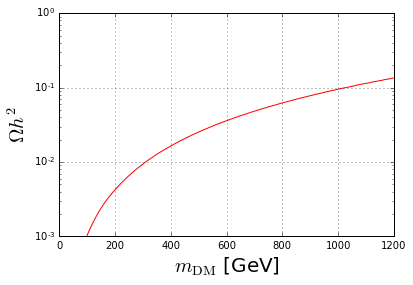

In [17]:
plt.semilogy(df.MDF,df.Omega_h2,'r-')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.savefig('omega.pdf')


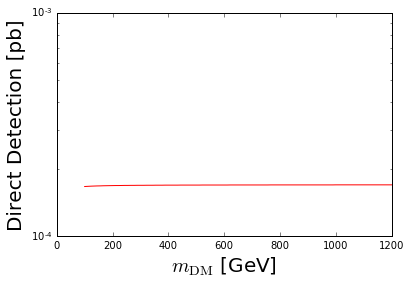

In [18]:
plt.semilogy(df.MDF,df.proton_SI,'r-')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.savefig('dd.pdf')

### Conclusion
The relic density is OK but the direct detection is a factor around 1.5 larger

## Bug in SARAH
The big problem appears for a degenate spectrum. For the next two plots we fix 
* $m_h=126\ \text{GeV} $
* $\lambda_L=0.1$

And vary $m_{\text{DM}}= m_{H^0}=m_{A^0}=m_{A^0}$
* $90< m_{\text{DM}}/\text{GeV}< 700$

After fix by hand [prtcls1.mdl](../micromegas/SimplifiedDMIDM/work/models/prtcls1.mdl), the problem disappear

In [9]:
dfd=pd.DataFrame()
ipt=pd.Series({'MDM':40,'MH3':120,'MHC':120,'lambda_L':0.1})
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
dm_masses=np.linspace(90,700,100)
for MDM in dm_masses:
    if np.where(dm_masses==MDM)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDM)[0][0]
    ipt.MDM=MDM
    ipt.MH3=MDM
    ipt.MHC=MDM
    mu2,lambda_3,lambda_4,lambda_5=phys_to_int(ipt.MDM,ipt.MH3,ipt.MHC,ipt.lambda_L,a.vev)
    a.LHA.blocks['MINPAR'][5]='%0.8E       #lambda5Input' %lambda_5
    a.LHA.blocks['MINPAR'][3]='%0.8E       #lambda4Input' %lambda_3
    a.LHA.blocks['MINPAR'][4]='%0.8E       #lambda3Input' %lambda_4
    a.LHA.blocks['MINPAR'][6]='%0.8E       #mEt2Input' %mu2
    a.runmicromegas(Direct_Detection=True)
    a.Series=a.Series.append(ipt)
    a.Series=a.Series.append(pd.Series({'MH0':a.LHA_out.blocks['MASS'][35],\
                                        'MA0':a.LHA_out.blocks['MASS'][36],\
                                        'MHc':a.LHA_out.blocks['MASS'][37]}))
    omhof=run_official_idm_lha(a.LHA_out,check=True)
    omo=a.micromegas_output(omhof)
    a.Series['Omega_h2_official']=omo.Omega_h2
    a.Series['proton_SI_official']=omo.proton.SI
    a.Series['neutron_SI_official']=omo.neutron.SI
    dfd=dfd.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


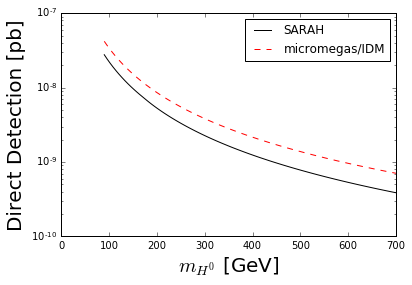

In [10]:
plt.semilogy(dfd.MH0,dfd.proton_SI,'k-',label='SARAH')
plt.semilogy(dfd.MH0,dfd.proton_SI_official,'r--',label='micromegas/IDM')
plt.xlabel(r'$m_{H^0}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.legend(loc='best')
plt.savefig('ddd.pdf')

### Conclusion
In [prtcls1.mdl](../micromegas/SimplifiedDMIDM/work/models/prtcls1.mdl) the order of the particles may be important

## Wrong benchmark
We now will produce specific input/output files for the bug report
### SARAH

In [13]:
mdf=1100
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDFINPYT' %mdf
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI

Omega h^2, SI proton, neutron = 0.114 0.0001702 0.007421


In [14]:
mdf=2000
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDFINPYT' %mdf
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI

Omega h^2, SI proton, neutron = 0.359 0.0001703 0.007427


In [15]:
mdf=200
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDFINPYT' %mdf
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI

Omega h^2, SI proton, neutron = 0.00422 0.0001689 0.007365


Dear Carolina and Martin,

I have implemented the doublet fermion dark matter model in SARAH, one of the simplest dark matter modeles which is already excluded by direct detection. After fix the order of the inert particles in work/models/prtcls1.mdl of micromegas model to be sure that the DM particle is the neutral one, I have again the result that the DD cross section for de Dirac dark matter candidate is again independent of the DM mass. Therefore we need to understand why this could be happen, whcih must be rather easy because this was the characterisc WIMP model through the Z portal, or report the bug to Florian.




##  Appendix 1
Full input/output for check point with
* $m_h=126 $GeV
* $m_[H^0]= 65\ \text{GeV}$
* $m_[A^0]= 701\ \text{GeV}  $
* $m_[H^+]= 701\ \text{GeV}  $
* $\lambda_L=0.01$

In [10]:
cat LesHouches.in.SimplifiedDMIDM

BLOCK MODSEL
   1   1              #  1/0: High/low scale input 
   2   1              # Boundary Condition  
   6   1              # Generation Mixing 

BLOCK SMINPUTS
   2   1.166370E-05   # G_F,Fermi constant 
   3   1.187000E-01   # alpha_s(MZ) SM MSbar 
   4   9.118870E+01   # Z-boson pole mass 
   5   4.180000E+00   # m_b(mb) SM MSbar 
   6   1.735000E+02   # m_top(pole) 
   7   1.776690E+00   # m_tau(pole) 

BLOCK MINPAR
   1   1.3000000E-01  # lambda1Input
   2   0.0000000E+00  # lambda2Input
   3   1.60918999E+01       #lambda3Input
   4   -8.03594996E+00       #lambda4Input
   5   -8.03594996E+00       #lambda5Input
   6   3.61875431E+03       #mEt2Input

BLOCK SPHENOINPUT
   1   -1             # error level 
   2   0              # SPA conventions 
   11   1              # calculate branching ratios 
   13   1               # 3-Body decays: none (0), fermion (1), scalar (2), both (3)
   14   0              # Run couplings to scale of decaying particle 
   12   1.000E-15     

In [11]:
cat SPheno.spc.SimplifiedDMIDM

# SUSY Les Houches Accord 2 - SimplifiedDM/IDM Spectrum + Decays + Flavor Observables
# SPheno module generated by SARAH
# ----------------------------------------------------------------------
# SPheno v3.3.8  
#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101
#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573
# SARAH: 4.8.5   
#   F. Staub; arXiv:0806.0538 (online manual)
#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863
#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840
#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906
#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 
# Including the calculation of flavor observables based on the FlavorKit 
#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 
# Two-loop masss corrections to Higgs fields based on 
#   M. D. Goodsell, K. Nickel, F. Staub; arXiv:1411.0675 
#  

## Appendix 2
Input file for official IDM in micromegas

In [14]:
cat mo.dat

MH3 700.999999
MHC 700.999999
MHX 64.9999953
Mh 125.548349
la2 0.0
laL 0.00999999


[Jupyter home](./draft.pdf)

See [Output LaTeX](./draft.tex) file

In [38]:
%%bash
pdflatex draft.tex > /dev/null

[[PDF]](./draft.pdf)